In [2]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_excel("Coffee Shop Sales.xlsx")
df = df.drop(axis=1, labels='transaction_id')
df.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
minutes = [ (i.hour*60 + (i.minute // 15)*15)  for i in df['transaction_time']] 
df['fulltime'] = [ df['transaction_date'][i] + pd.DateOffset(minutes=int(minutes[i])) for i in df.index]
df['fulltime']

0        2023-01-01 07:00:00
1        2023-01-01 07:00:00
2        2023-01-01 07:00:00
3        2023-01-01 07:15:00
4        2023-01-01 07:15:00
                 ...        
149111   2023-06-30 20:15:00
149112   2023-06-30 20:15:00
149113   2023-06-30 20:30:00
149114   2023-06-30 20:45:00
149115   2023-06-30 20:45:00
Name: fulltime, Length: 149116, dtype: datetime64[ns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_time  149116 non-null  object        
 2   transaction_qty   149116 non-null  int64         
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   unit_price        149116 non-null  float64       
 7   product_category  149116 non-null  object        
 8   product_type      149116 non-null  object        
 9   product_detail    149116 non-null  object        
 10  fulltime          149116 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 12.5+ MB


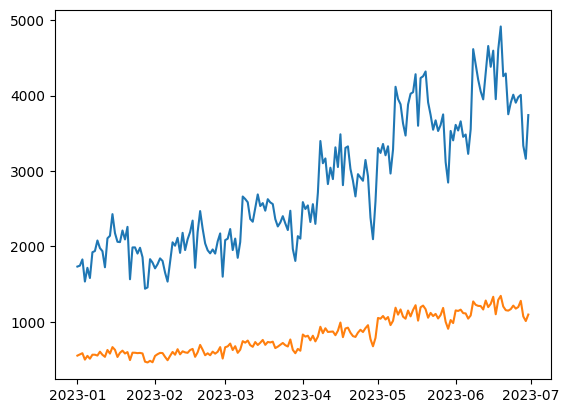

In [6]:
plt.plot(df['transaction_date'].unique(),df.groupby(by="transaction_date")['unit_price'].sum())
plt.plot(df['transaction_date'].unique(),df.groupby(by="transaction_date")['unit_price'].count())

Количество позиций в чеке

In [7]:
pd.DataFrame(df.groupby(['fulltime','store_id']))

,0,1
0,"(2023-01-01 07:00:00, 5)",transaction_date transaction_time transacti...
1,"(2023-01-01 07:15:00, 5)",transaction_date transaction_time transacti...
2,"(2023-01-01 07:30:00, 5)",transaction_date transaction_time transact...
3,"(2023-01-01 07:45:00, 5)",transaction_date transaction_time transact...
4,"(2023-01-01 08:00:00, 8)",transaction_date transaction_time transact...
...,...,...
25239,"(2023-06-30 20:00:00, 8)",transaction_date transaction_time tran...
25240,"(2023-06-30 20:15:00, 5)",transaction_date transaction_time tran...
25241,"(2023-06-30 20:15:00, 8)",transaction_date transaction_time tran...
25242,"(2023-06-30 20:30:00, 8)",transaction_date transaction_time tran...


<Axes: xlabel='fulltime'>

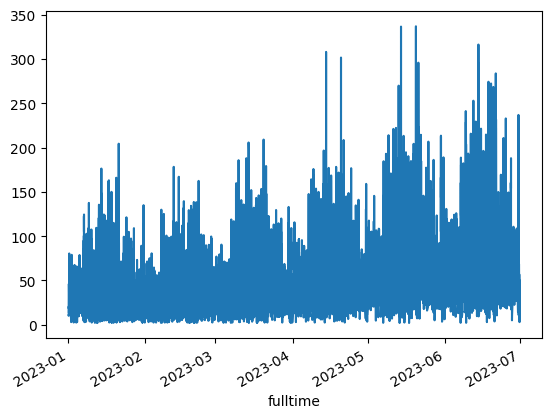

In [8]:
df.groupby(['fulltime'])['unit_price'].sum().plot()